In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from dev import ESOINN
from dev.tests import UnitTest
from dev.commons import Plotter
from dev.samples import TrainingSamples
from dev.mock import load_input_signals
# from dev.mock import Graph, Node, load_mock, save_mock

### Auto tests

In [2]:
test_nn = ESOINN.EnhancedSelfOrganizingIncrementalNN([[1, 1], [1, 1]])
unit_test = UnitTest(test_nn)
res = unit_test.run_tests(1000)

2017-05-01 19:48:21,146 - dev.tests.UnitTest - DEBUG - 0.56735083	for 1000 find_winners
2017-05-01 19:48:21,155 - dev.tests.UnitTest - DEBUG - 0.00472920	for 1000 find_neighbors
2017-05-01 19:48:21,778 - dev.tests.UnitTest - DEBUG - 0.61964404	for 1000 calc_threshold
2017-05-01 19:48:21,786 - dev.tests.UnitTest - DEBUG - 0.00591075	for 1000 update_edges_age
2017-05-01 19:48:21,872 - dev.tests.UnitTest - DEBUG - 0.08464199	for 1000 update_node_points
2017-05-01 19:48:21,984 - dev.tests.UnitTest - DEBUG - 0.10193636	for 1000 update_node_density
2017-05-01 19:48:22,057 - dev.tests.UnitTest - DEBUG - 0.06307471	for 1000 update_feature_vectors
2017-05-01 19:48:22,075 - dev.tests.UnitTest - DEBUG - 0.01666574	for 1000 remove_old_ages
2017-05-01 19:48:22,148 - dev.tests.UnitTest - DEBUG - 0.07083241	for 1000 calc_mean_density_in_subclass
2017-05-01 19:48:22,220 - dev.tests.UnitTest - DEBUG - 0.07068488	for 1000 calc_alpha
2017-05-01 19:48:22,376 - dev.tests.UnitTest - DEBUG - 0.14716421	for 1

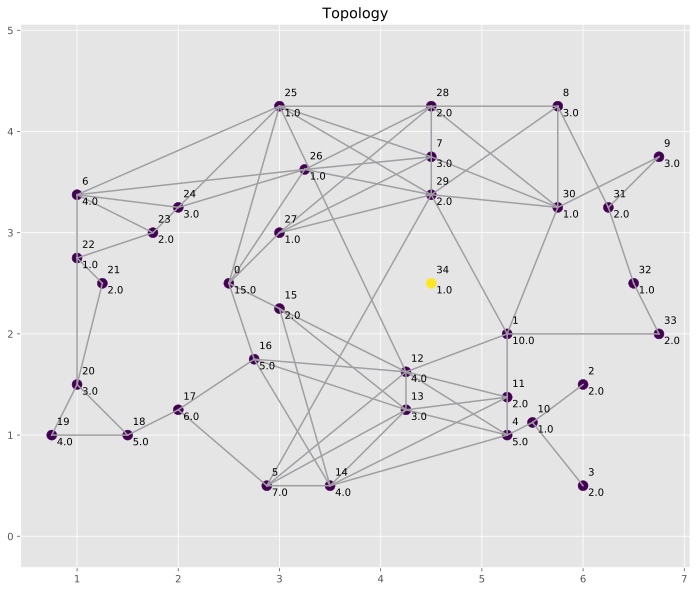

In [3]:
unit_test.display_info(plot=True)
# test_nn.current_state()

### Manual tests

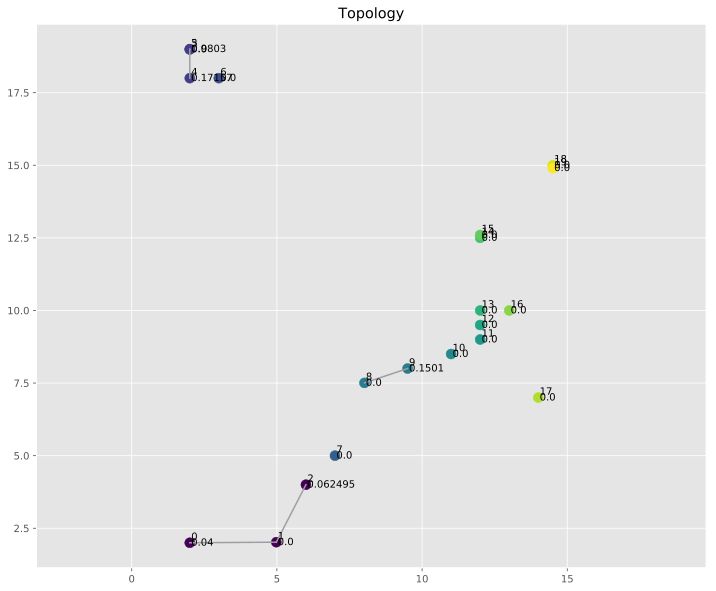

2017-05-01 19:48:24,976 - dev.commons.Plotter - WARNING - No edges


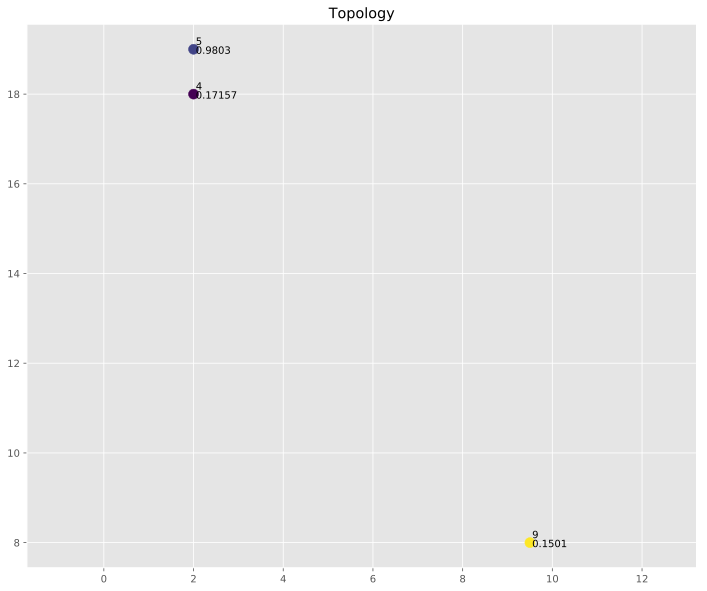

In [4]:
TRACE = False
SEPARATE_PLOTS = False

nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(
    init_nodes=[[1, 2], [5, 2]],
)
signals = load_input_signals()

plotter = Plotter(nn)

nn.fit(signals)
plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

# # test for predictions
# nn.predict([3, 15])

# # test for old edge removal
# nn.edges[(0,1)] = 51
# nn.remove_old_ages()
# plotter.display_edges(log=True)

# test for noize removal
nn.remove_noise()
plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

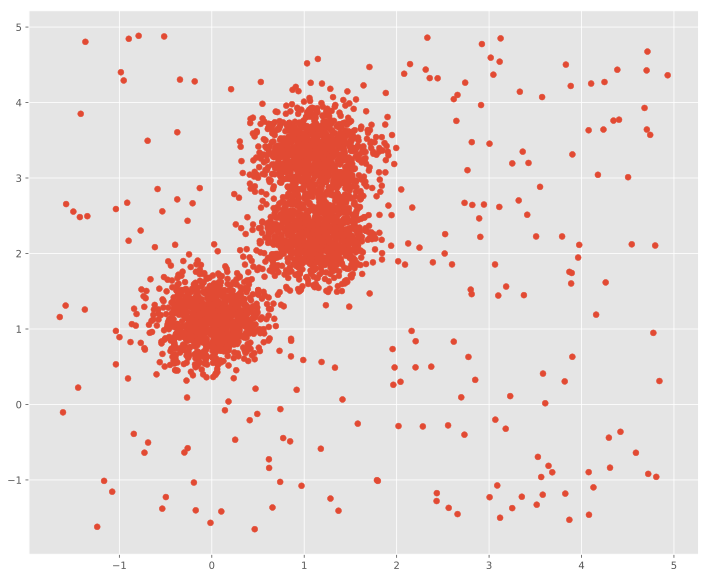

In [18]:
tsmpl = TrainingSamples(123)
sample = tsmpl.get_gauss_sample(count=3, bias=0.9, size=1000, noise=25)
plt.scatter(sample[:, 0], sample[:, 1]);

In [6]:
# nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(
#     init_nodes=[[1, 2], [5, 2]],
# )

# plotter = Plotter(nn)

# nn.fit(sample)
# plotter.display_info(plot=True, separate_show=False, log=False)

In [7]:
state = nn.current_state()
state.keys()
len(state['classes'])

dict_keys(['count_signals', 'count_neurons', 'last_node_id', 'nodes', 'neighbors', 'edges', 'classes', 'configuration'])

3